# 分类、预测与聚类

github地址：https://github.com/Chen-Jiake/DataMiningAssignment/tree/main/Assignment3

## 1.数据预处理

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn import preprocessing
import sklearn.tree as st
import sklearn.metrics as sm
from sklearn.utils import shuffle

In [2]:
path="/home/fc/code/VideoGameSales/vgsales.csv"

In [3]:
data = pd.read_csv(path)

In [4]:
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


该数据集包括了以下属性：
- Rank - 该游戏总销售量的排名
- Name - 游戏的名称
- Platform - 游戏发行的平台
- Year - 游戏发行的年份
- Genre - 游戏的类别
- Publisher - 游戏的发行商
- NA_Sales - 游戏在北美的销售量
- EU_Sales - 游戏在欧洲的销售量
- JP_Sales - 游戏在日本的销售量
- Other_Sales - 游戏在其它地区的销售量
- Global_Sales - 游戏在全球的销售量

统计并删除数据集中的缺失值：

In [6]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


## 2.电子游戏市场分析

最受欢迎的游戏：

根据游戏在全球的销售量分析，最受欢迎的游戏就是排名第一的 Wii Sports，它在全球的销售量达到了82.74百万美元，该游戏的详细信息如下所示：

In [8]:
print(data.iloc[0,:])

Rank                     1
Name            Wii Sports
Platform               Wii
Year                  2006
Genre               Sports
Publisher         Nintendo
NA_Sales             41.49
EU_Sales             29.02
JP_Sales              3.77
Other_Sales           8.46
Global_Sales         82.74
Name: 0, dtype: object


最受欢迎的游戏类型：

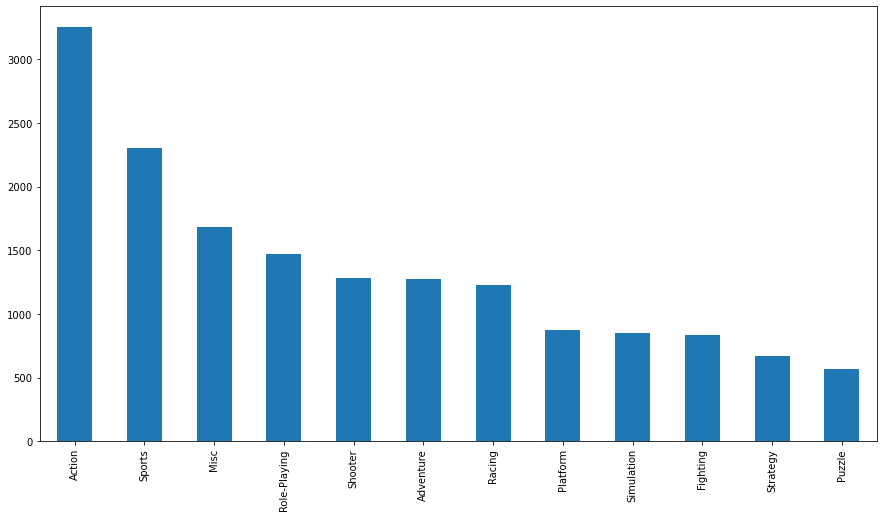

In [9]:
data['Genre'].value_counts().plot(kind="bar", figsize=(15,8))

从上图中可以看出最受欢迎的游戏类型是Action

最受欢迎的游戏发行平台：

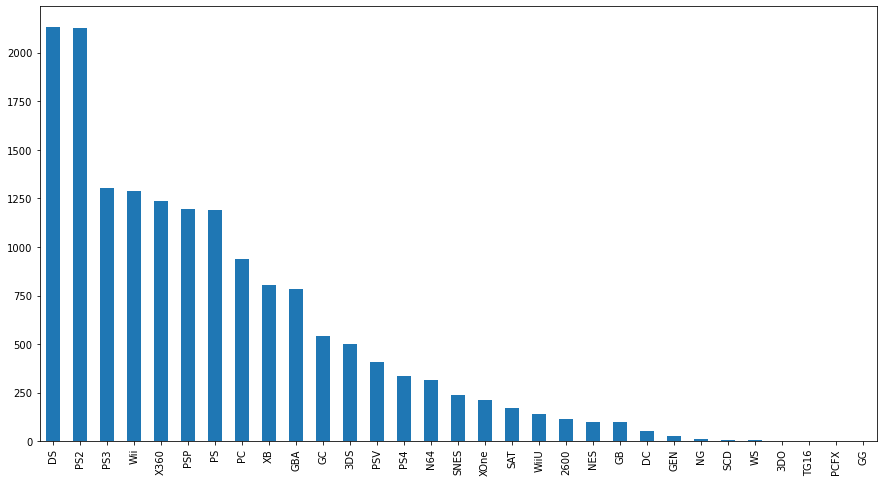

In [10]:
data['Platform'].value_counts().plot(kind="bar", figsize=(15,8))

从上图中可以看出最受欢迎的游戏发行平台是DS

最受欢迎的游戏发行商：(取前50名)

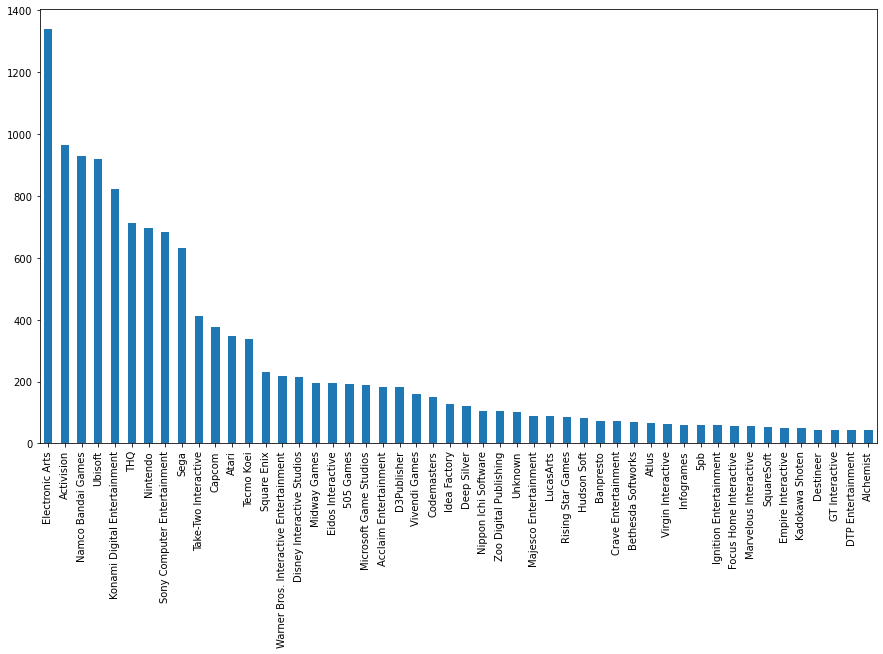

In [11]:
data['Publisher'].value_counts()[:50].plot(kind="bar", figsize=(15,8))

从上图中可以看出最受欢迎的游戏发行平台是Electronic Arts

## 2.预测每年电子游戏销售额

首先计算每年电子游戏的销售额：

In [12]:
sales = data[['Year', 'Global_Sales']].groupby(by = ['Year']).sum().reset_index()
sales

,Year,Global_Sales
0,1980.0,11.38
1,1981.0,35.77
2,1982.0,28.86
3,1983.0,16.79
4,1984.0,50.36
5,1985.0,53.94
6,1986.0,37.07
7,1987.0,21.74
8,1988.0,47.22
9,1989.0,73.45


每年电子游戏销售额可以发现表中2016年、2017年、2020年的数据异常，由于该数据集是在2016年整理的，所以使用截至2015年的数据进行训练。使用线性回归预测2016年-2020年的电子游戏销售额。

In [13]:
x = []
y = []
for _, row in sales.iterrows():
    x.append([row['Year']])
    y.append(row['Global_Sales'])

polynomial = PolynomialFeatures(degree = 3)
 
model = LinearRegression()
model.fit(polynomial.fit_transform(x), y)

LinearRegression()

In [14]:
x_predict = [[x] for x in range(1980,2021)]
y_predict = model.predict(polynomial.fit_transform(x_predict))

预测的结果如下图所示：

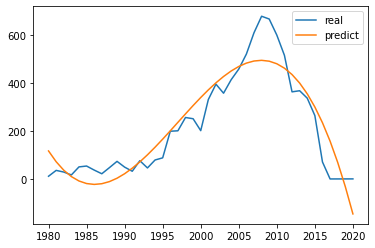

In [15]:
plt.figure()
plt.plot(x, y, label = 'real')
plt.plot(x_predict, y_predict, label = 'predict')
plt.legend()
plt.show()

## 3.预测游戏全球销售额

通过游戏发行年份、发行平台、游戏类别、发行商、游戏的北美销量来预测其全球的销售量。使用回归决策树进行预测。

In [16]:
data_new = data[["Year","Platform","Genre","Publisher","NA_Sales","Global_Sales"]]
data_new = data_new.copy(deep=True)

le = preprocessing.LabelEncoder()
data_new["Platform"] = le.fit_transform(data_new["Platform"].values)
data_new["Genre"] = le.fit_transform(data_new["Genre"].values)
data_new["Publisher"] = le.fit_transform(data_new["Publisher"].values)

In [17]:
data_new

,Year,Platform,Genre,Publisher,NA_Sales,Global_Sales
0,2006.0,26,10,359,41.49,82.74
1,1985.0,11,4,359,29.08,40.24
2,2008.0,26,6,359,15.85,35.82
3,2009.0,26,10,359,15.75,33.00
4,1996.0,5,7,359,11.27,31.37
...,...,...,...,...,...,...
16593,2002.0,6,4,269,0.01,0.01
16594,2003.0,7,8,241,0.01,0.01
16595,2008.0,16,6,21,0.00,0.01
16596,2010.0,4,5,8,0.00,0.01


划分训练集和测试集：

In [18]:
data_new = shuffle(data_new)
train_size = int (len(data_new) * 0.8)
x_train = data_new.values[:train_size,:-1]
y_train = data_new.values[:train_size,-1]
x_test = data_new.values[train_size:,:-1]
y_test = data_new.values[train_size:,-1]

In [19]:
model = st.DecisionTreeRegressor(max_depth=10)
model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [20]:
y_pred = model.predict(x_test)

训练好模型之后对其进行评价，计算模型的MSE和R2，得到的结果为：

In [21]:
print("MSE:",sm.mean_squared_error(y_test, y_pred))
print("R2:",sm.r2_score(y_test, y_pred))

MSE: 0.21896938658352147
R2: 0.8359983303806746


从MSE和R2的值可以看出模型的结果较好